In [1]:
#importing packages and performing dataanalysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df['alcohol'].value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.500000     67
            ... 
11.950000      1
9.233333       1
11.066667      1
13.200000      1
9.566667       1
Name: alcohol, Length: 65, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtypes!='O']
dis_features = [feature for feature in df.columns if len(df[feature].unique())<25]
con_features = [feature for feature in df.columns if feature not in dis_features]
print('Numerical_Feature: {}'. format(len(num_features)) )
print('Discrete_Feature: {}'. format(len(dis_features)))
print('Continous_Feature: {}'.format(len(con_features)))

Numerical_Feature: 12
Discrete_Feature: 1
Continous_Feature: 11


In [11]:
dis_features

['quality']

C:\Users\HI\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


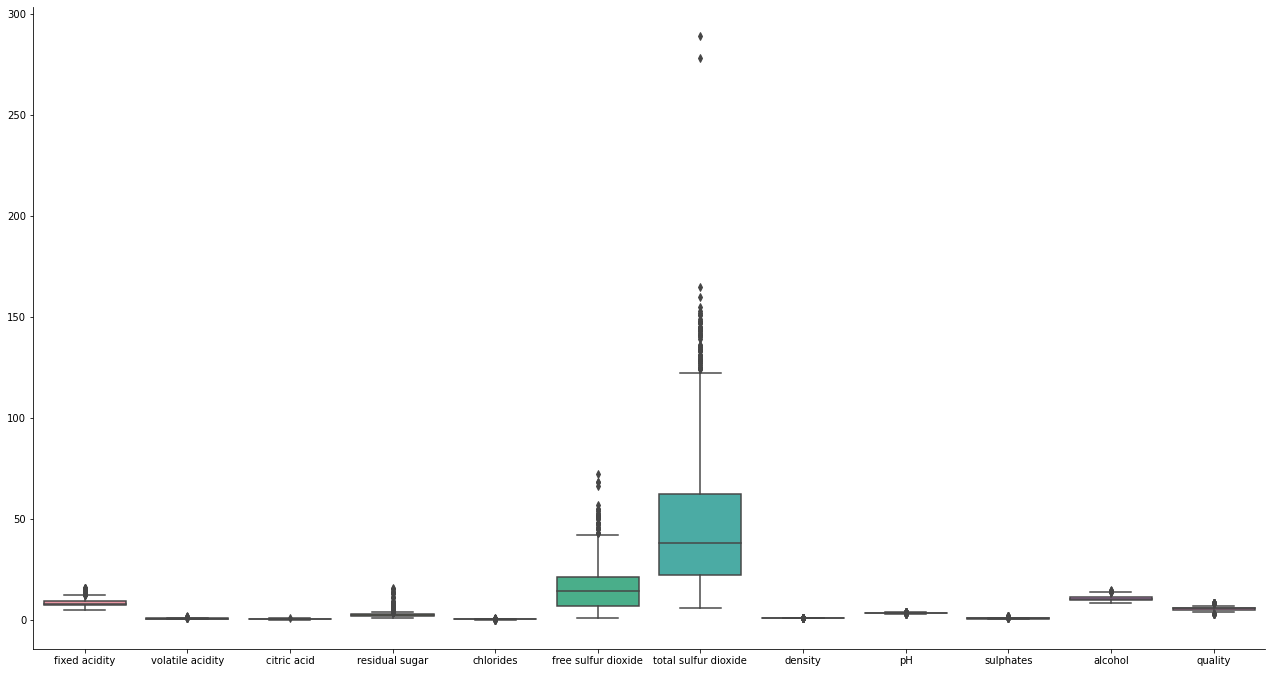

In [12]:
f = sns.factorplot(data=df,kind='box')

f.fig.set_size_inches(20, 10)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [14]:
min_thresold, max_thresold = df['total sulfur dioxide'].quantile([0.001, 0.999])
min_thresold, max_thresold

(6.0, 210.42600000003063)

In [15]:
df2 = df[(df['total sulfur dioxide']<max_thresold)& (df['total sulfur dioxide']>min_thresold )]

In [16]:
df2.shape

(1594, 12)

In [17]:
df2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [18]:
df2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1594 rows x 12 columns]

checking_missing_values

In [19]:
df.isnull().sum()*100/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [20]:
df2.isnull().sum()*100/len(df2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Visualizing the dataset

In [21]:
fig = px.bar(df, x = 'alcohol', y = 'quality', color = 'quality')
fig.show()

In [22]:
fig = px.bar(df, x = 'total sulfur dioxide', y = 'quality', color = 'quality')
fig.show()

In [23]:
fig = px.histogram(df, x = 'citric acid', y = 'quality', color = 'quality')
fig.show()

In [24]:
fig = px.scatter(df, x = 'fixed acidity', y = 'quality', color = 'quality')
fig.show()

In [25]:
fig = px.scatter(df, x = 'density', y = 'quality', color = 'quality')
fig.show()

In [26]:
fig = px.bar(df, x = 'total sulfur dioxide', y = 'quality', color = 'quality')
fig.show()

In [27]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [28]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [29]:
sns.set(style="whitegrid")

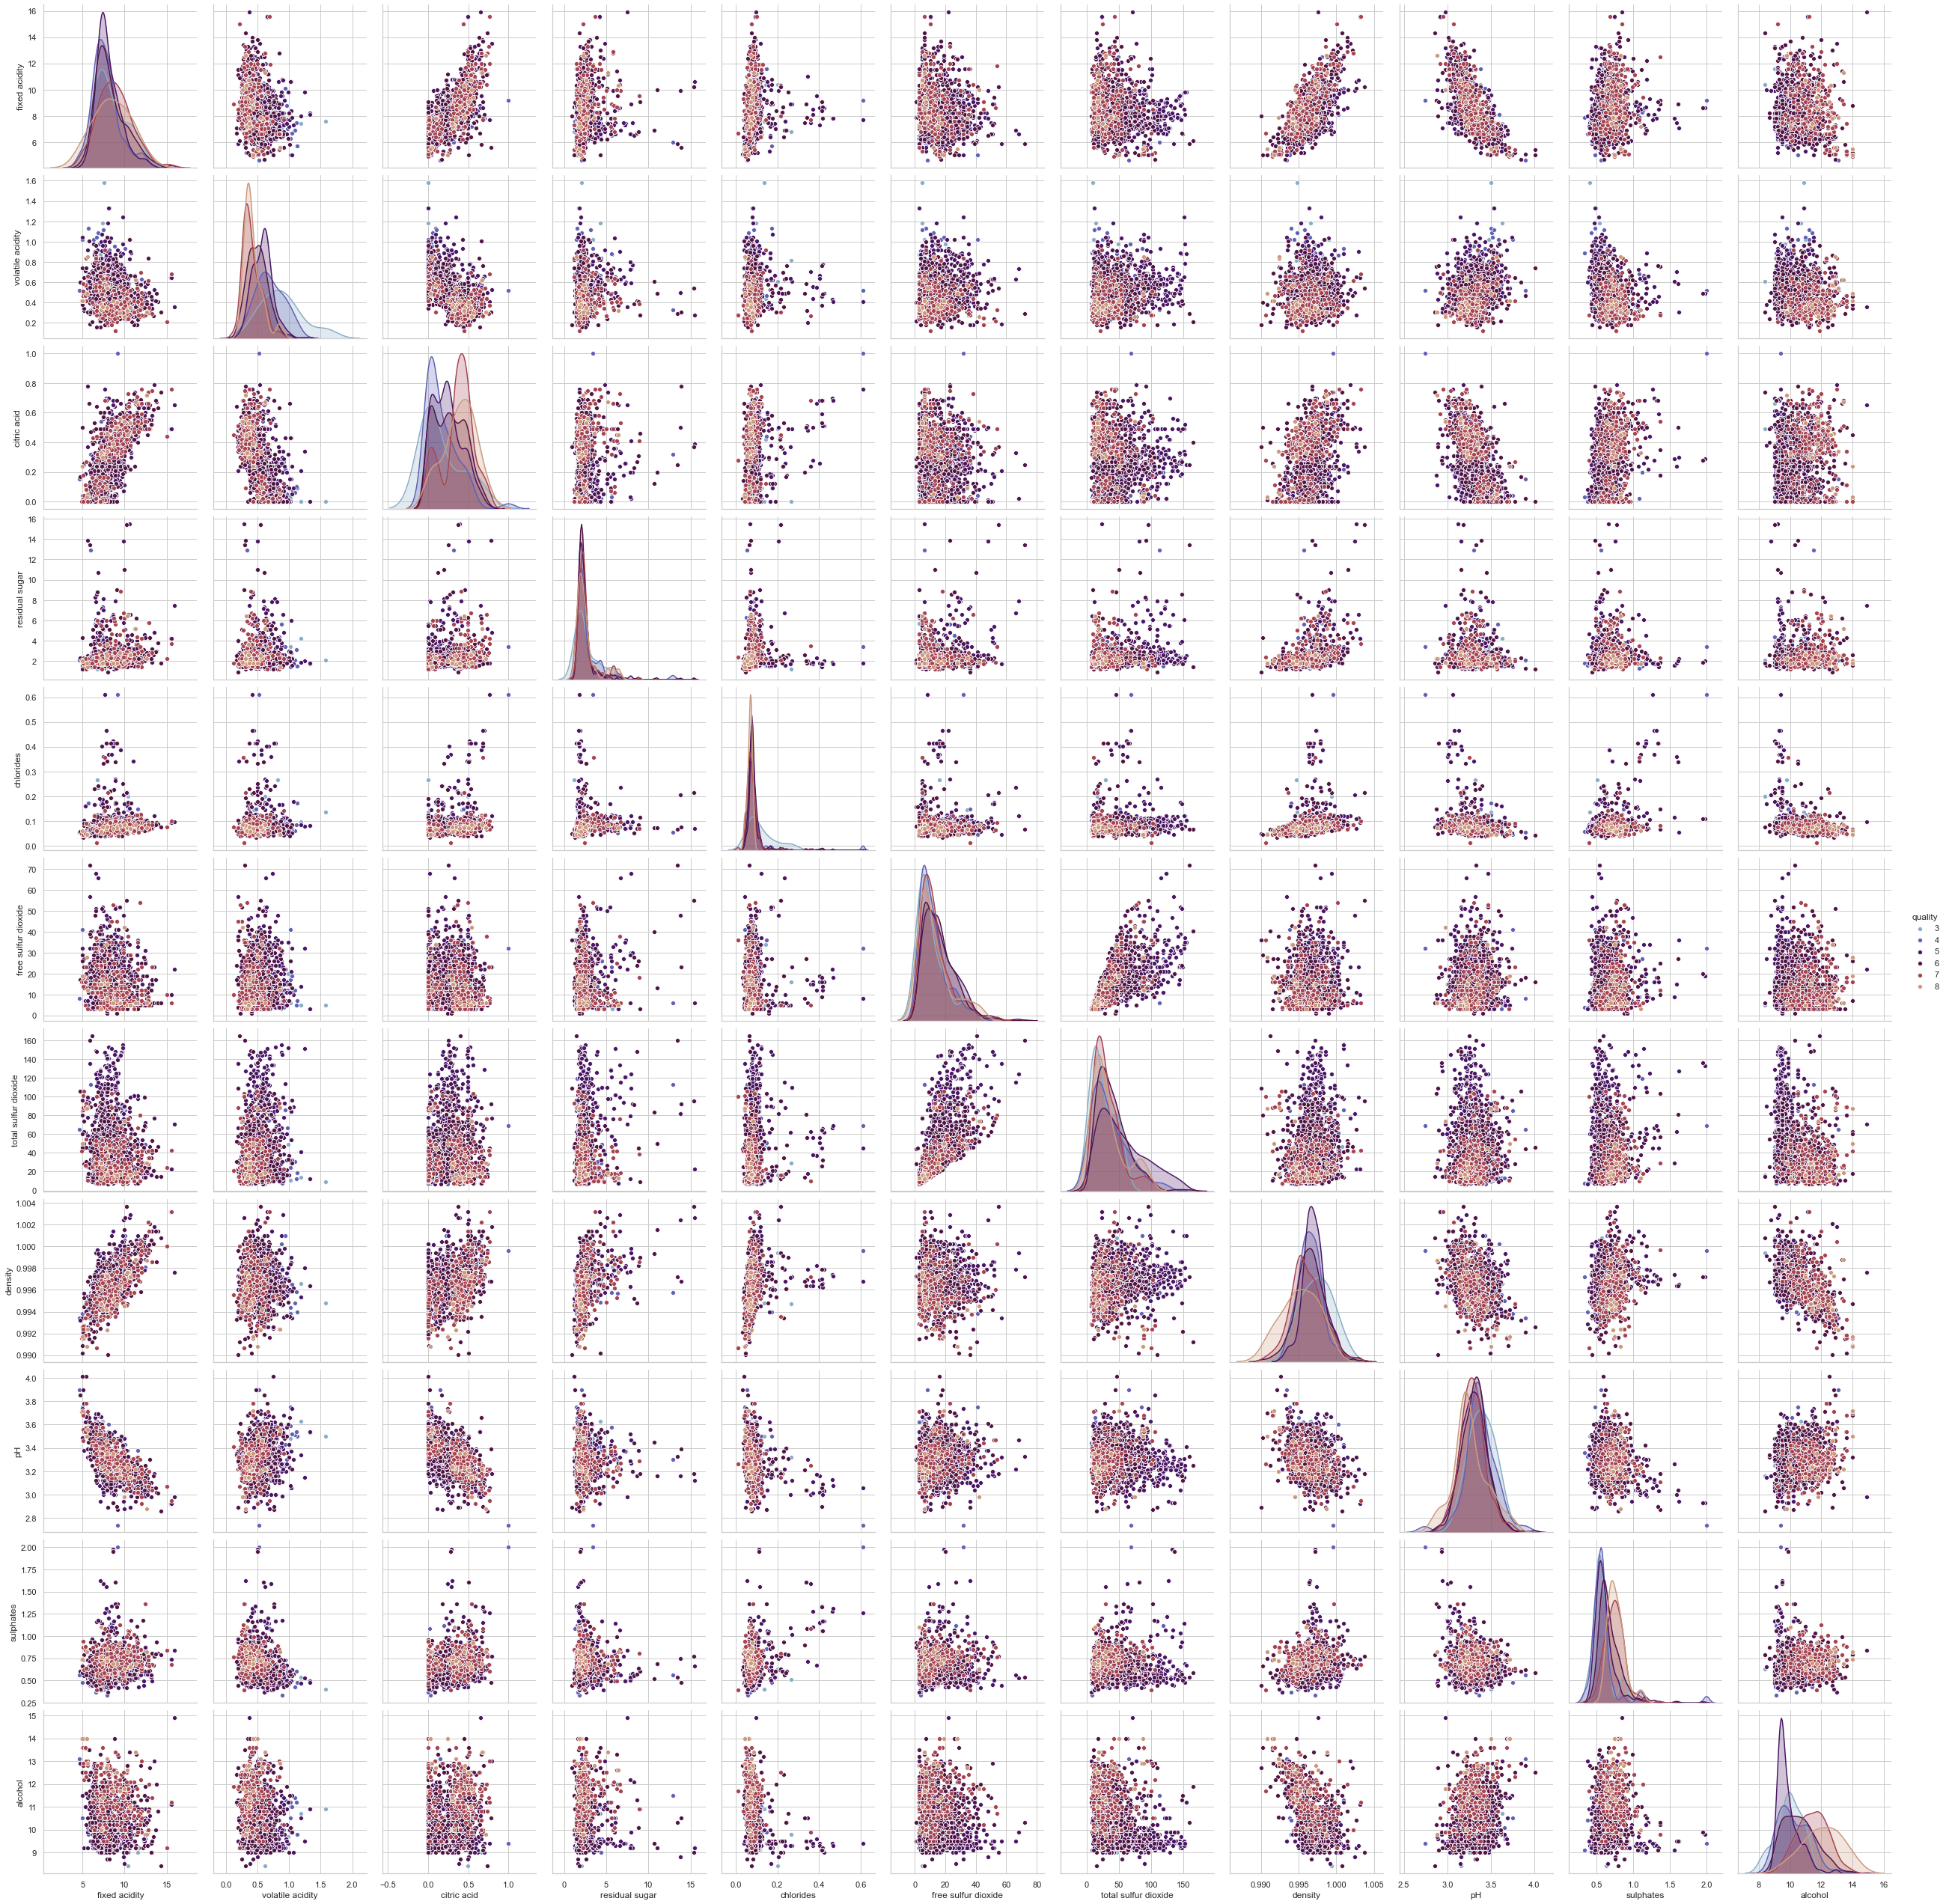

In [30]:
sns.pairplot(df2,hue='quality',height=3.2, palette = 'twilight')

In [33]:
#heatmap to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. 

<AxesSubplot:>

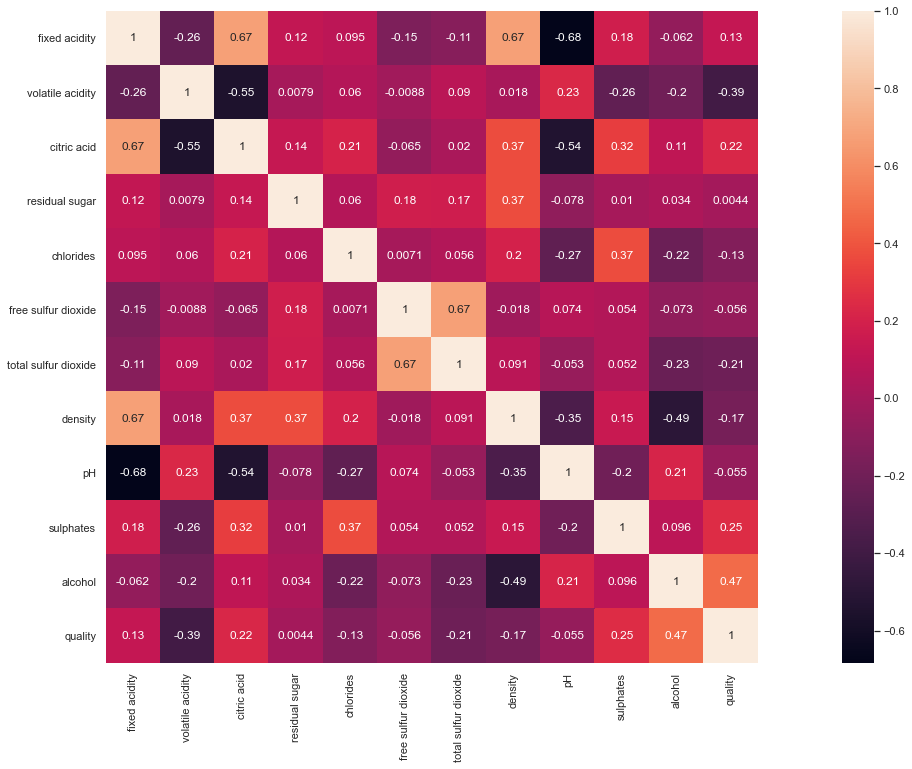

In [34]:
corr_mat=df2.corr()
mask=np.array(corr_mat)
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr_mat,annot=True,cbar=True,square=True)

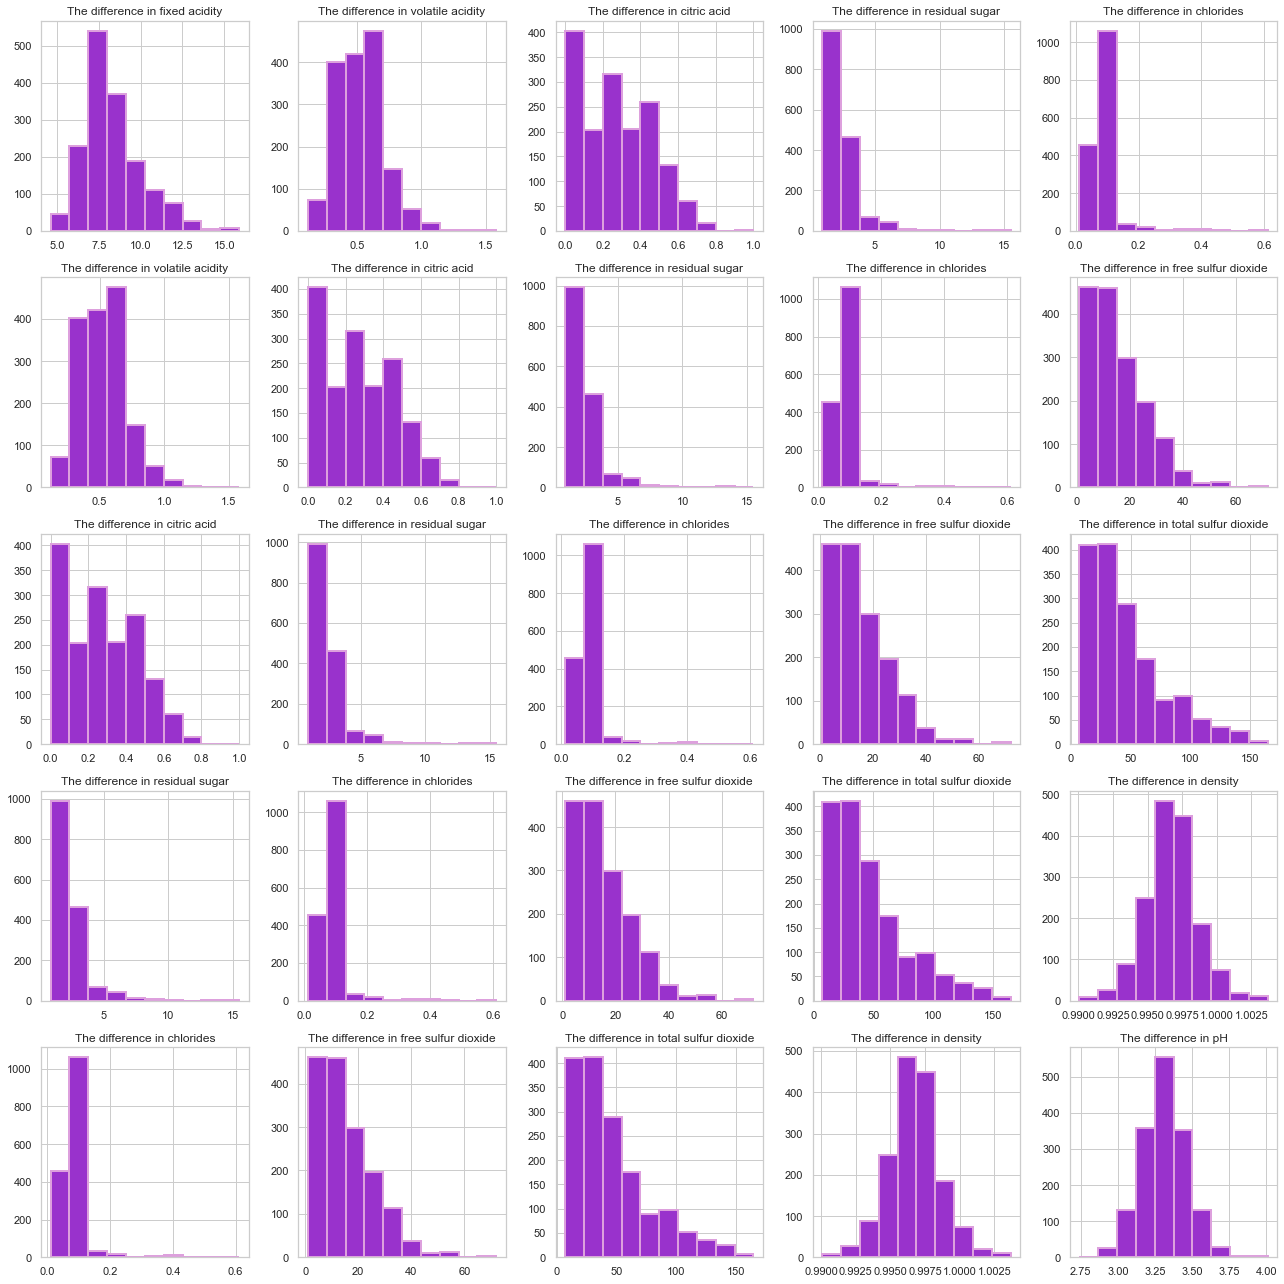

In [35]:
fig,axes = plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x = columns[i+j], linewidth =2, data = df2 , edgecolor = 'plum', color = 'darkorchid')
        axes[i,j].set_title('The difference in '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

<AxesSubplot:>

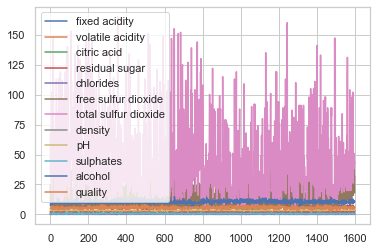

In [36]:
df2.plot()

In [72]:
#Defing the target variable and divinding into x and y

In [73]:
x=df2.drop("quality",axis=1)
y=df2.quality

In [38]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1594 rows x 11 columns]

In [39]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1594, dtype: int64

In [40]:
#performing the train and test of the given dataset

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state=3)
x_train.shape,y_train.shape

((1195, 11), (1195,))

In [42]:
#model_Selection

In [43]:
# since it is a supervised machinelearning and we define the output column we use liner_Regression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_predict=lr.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

acs=accuracy_score(y_test,y_predict.round(),normalize=True)

In [48]:
acs

0.6040100250626567

In [49]:
# The given dataset is kind a look like Classification and Regression so I have used Random forests which is a supervised learning algorithm. It can be used both for classification and regression

In [50]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
Y_predict=model.predict(x_test)

In [52]:
acc=accuracy_score(y_test,y_predict.round())
acc

0.6040100250626567

In [53]:
#Using The Random Forest I didnt find a accurate score so i have made quality into <6 as '0'and >'6' as '1'

In [54]:
df2['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [55]:
df2['quality'].value_counts()

5    679
6    637
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

In [56]:
df2[['quality']]=df2['quality'].apply(lambda x: 0 if int(x)<6 else 1)
    

In [57]:
df2['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1594, dtype: int64

In [58]:
df2['quality'].unique()

array([0, 1], dtype=int64)

In [59]:
df2['quality'].value_counts()

1    852
0    742
Name: quality, dtype: int64

In [60]:
x=df2.drop("quality",axis=1)
y=df2.quality

In [61]:
#training and testing the data

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20,random_state=3)
x_train.shape,y_train.shape

((1275, 11), (1275,))

In [63]:
#model selection 

In [64]:
# using LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=10000)
model1.fit(x_train,y_train)
model1=model1.score(x_test,y_test)

In [66]:
model1

0.7836990595611285

In [67]:
#using Random_Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
y_pred=model2.predict(x_test)

In [70]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [71]:
from sklearn import metrics

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8589341692789969
